In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Generate synthetic time series data
np.random.seed(42)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
data = pd.DataFrame({'Date': time_index,
                     'Y': np.random.randn(100)})

# Create a new column with the difference between consecutive data points
data['Y_diff'] = data['Y'].diff()

# Drop rows with NaN values (due to the difference calculation)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create a regression model using the difference as the dependent variable
X_train = train_data[['Y']]
y_train = train_data['Y_diff']
X_test = test_data[['Y']]
y_test = test_data['Y_diff']

In [3]:
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)  # Ordinary Least Squares (OLS) regression
results = model.fit()

In [4]:
# Print the regression summary
print(results.summary())

# Make predictions on the testing data
y_pred_diff = results.predict(X_test)

# Calculate the predicted Y values from the differences
y_pred = test_data['Y'].iloc[0] + np.cumsum(y_pred_diff)

                            OLS Regression Results                            
Dep. Variable:                 Y_diff   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     85.24
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.27e-14
Time:                        01:27:05   Log-Likelihood:                -106.66
No. Observations:                  79   AIC:                             217.3
Df Residuals:                      77   BIC:                             222.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1040      0.107      0.969      0.3

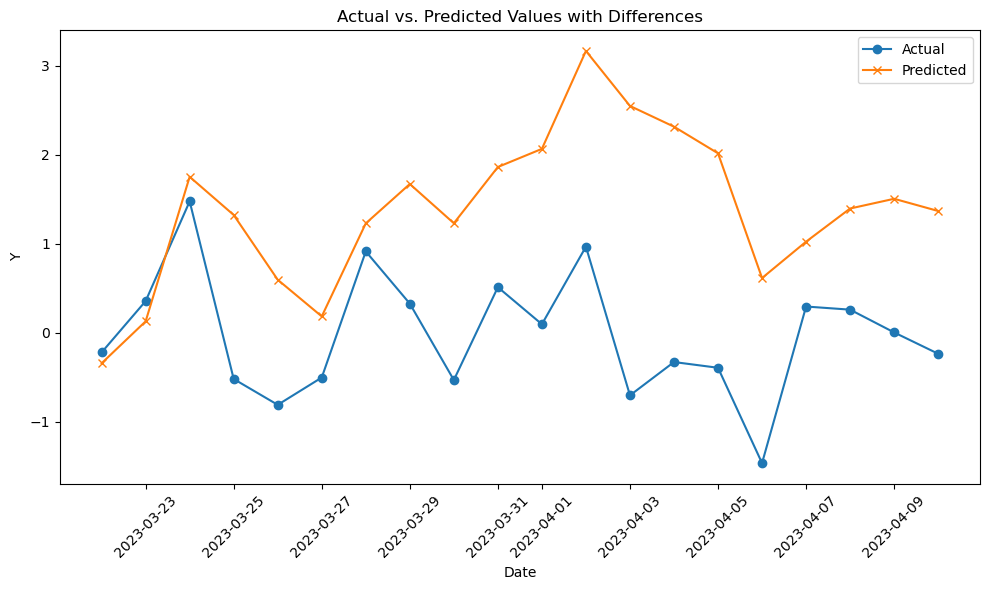

In [5]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Y'], label='Actual', marker='o')
plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values with Differences')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
